#Data 05: Personal Loan data
* Data from: [Personal Loan](https://www.kaggle.com/itsmesunil/bank-loan-modelling)  
Personal Loan 데이터는 고객을 더 늘리고자 하는 가상의 은행 데이터이다.  
이 회사의 경영진은 부채를 가진 고객을 개인 대출 고객으로 전환하는 방법을 모색하려고 한다.

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (23.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=1)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['font.family'] = 'NanumGothic'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [21]:
ldf = pd.read_excel('/content/drive/MyDrive/dataset/LAB_dataset/Personal_Loan.xlsx',sheet_name=1)

ldf.head(4)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0


<컬럼 설명>

* ID: 고객 번호
* Age: 나이
* Experience: 근속년수
* Income: 연간 수입(000)  
* Zipcode: 우편번호  
* Family: 가족 구성원 수
* CCAvg: 신용카드 월평균 이용 금액(000)  
* Education: 학력(1: Undergrad, 2: Graduate, 3: Advanced/Professional)
* Mortgage: 주택 담보 대출 금액(000)
* Personal Loan: 지난번 영업에서 고객이 개인대출을 받았는가?(0: N, 1: Y)  
* Securities Account: 보험 유무(0: N, 1: Y)  
* CD Account:양도성 예금증서 보유 유무(0: N, 1: Y)  
* Online: 온라인 뱅킹 유무(0: N, 1: Y)
* Credit Card: 신용카드 보유 유무(0: N, 1: Y)


* 범주형 변수: *빈도frequency 계산 가능*
               ID, zipcode, educaiont, personal loan, securities account, cd account, online, credit card
* 연속형 변수: *평균, 표준편차, min/max 등 수치 계산 가능*
               age, experience, income, family, ccavg, mortgage

In [7]:
ldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
print('Education: ', ldf['Education'].unique())
print('Personal Loan: ', ldf['Personal Loan'].unique())
print('Securities Account: ', ldf['Securities Account'].unique())
print('CD Account: ', ldf['CD Account'].unique())
print('Online: ', ldf['Online'].unique())
print('CreditCard: ', ldf['CreditCard'].unique())

Education:  [1 2 3]
Personal Loan:  [0 1]
Securities Account:  [1 0]
CD Account:  [0 1]
Online:  [0 1]
CreditCard:  [0 1]


In [11]:
ldf.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
print('총데이터 수 :',ldf.shape[0]*ldf.shape[1])

print('결측치 수 : ',ldf.isnull().sum().sum())



총데이터 수 : 70000
결측치 수 :  0


##2.질문하기

* 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계는?
* 월 평균 사용 금액을 구간화 해서 특징을 볼 수 있을까?
* 로지스틱 회귀 분석을 사용해서 신규 고객의 대출여부를 예측하는 모델 만들기

In [13]:
ldf.duplicated().sum()

0

In [14]:
ldf.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [22]:
ldf.columns=['id', 'age', 'exp', 'income', 'zip', 'fam', 'ccavg',
       'edu', 'mort', 'loan', 'secu',
       'cd', 'online', 'cc']

# 필요없는 컬럼 삭제하기.

In [23]:
ldf1=ldf.drop(columns=['id','zip'],axis=1,inplace=False)

In [24]:
ldf1.head(4)

,age,exp,income,fam,ccavg,edu,mort,loan,secu,cd,online,cc
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0


#EDA

In [25]:
# 수입과 대출 사이의 관계 집계하기

df1 = ldf1.groupby('loan')['income'].agg([np.mean,'count'])

df1.rename(columns={'mean' : 'CCAvg Mean','count' : 'Number of People'})

,CCAvg Mean,Number of People
loan,,
0,66.237389,4520
1,144.745833,480


In [27]:
# 월평균 신용카드 사용액과 대출 사이의 관계 집계하기

df2 = ldf1.groupby('loan')['ccavg'].agg([np.mean,'count'])

df2

,mean,count
loan,,
0,1.728982,4520
1,3.905347,480


In [28]:
# 가족인원수와 대출 사이의 관계 집계하기

df3 = ldf1.groupby('fam')['loan'].agg([np.mean,'count'])

df3

,mean,count
fam,,
1,0.072690,1472
2,0.081790,1296
3,0.131683,1010
4,0.109656,1222


## 변수의 분포 확인하기.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


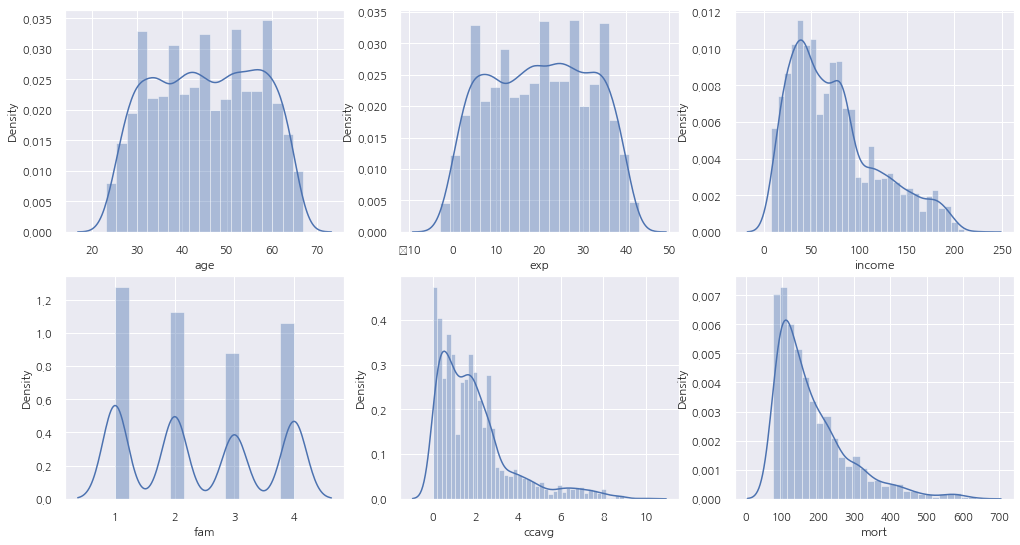

In [33]:
f, ax = plt.subplots(2,3,figsize=(17,9))

sns.distplot(ldf1['age'],ax=ax[0,0])
sns.distplot(ldf1['exp'],ax=ax[0,1])
sns.distplot(ldf1['income'],ax=ax[0,2])
sns.distplot(ldf1['fam'],ax=ax[1,0])
sns.distplot(ldf1['ccavg'],ax=ax[1,1])
sns.distplot(ldf1['mort'][ldf1['mort']!=0],ax=ax[1,2])

plt.show(
    
)

Text(0.5, 1.0, '소득 분포')

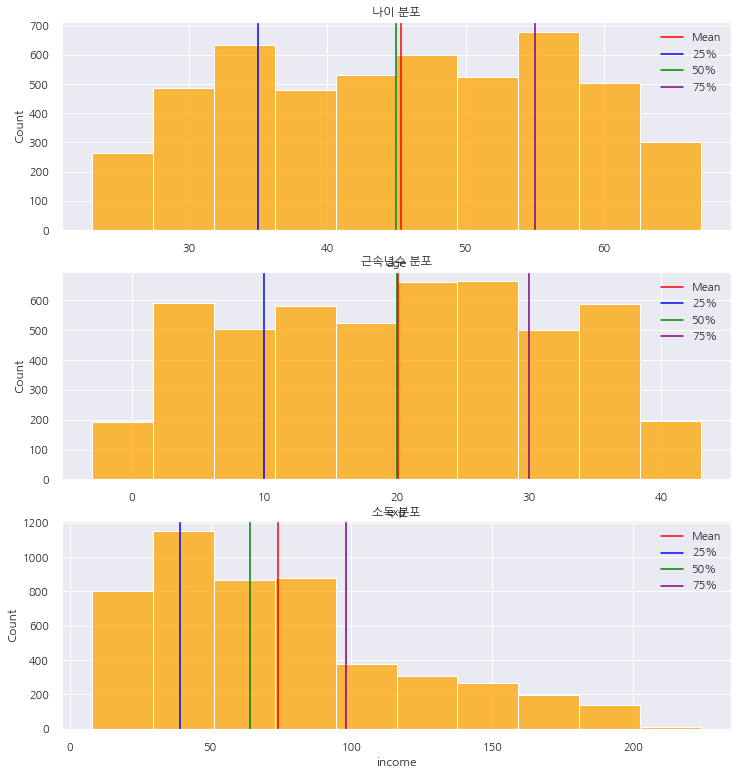

In [36]:
def draw_line(plt,col):
  mean= ldf1.describe().loc['mean',col]
  m25 = ldf1.describe().loc['25%',col]
  m50 = ldf1.describe().loc['50%',col]
  m75 = ldf1.describe().loc['75%',col]

  plt.axvline(mean,color='red')
  plt.axvline(m25,color='blue')
  plt.axvline(m50,color='green')
  plt.axvline(m75,color='purple')

  plt.legend(['Mean','25%','50%','75%'])


f, ax = plt.subplots(3,1,figsize=(12,13))

pp=sns.histplot(ldf1['age'],ax=ax[0],bins=10,color='orange')
draw_line(pp,'age')
ax[0].set_title('나이 분포')
pp=sns.histplot(ldf1['exp'],ax=ax[1],bins=10,color='orange')
draw_line(pp,'exp')
ax[1].set_title('근속년수 분포')
pp=sns.histplot(ldf1['income'],ax=ax[2],bins=10,color='orange')
draw_line(pp,'income')
ax[2].set_title('소득 분포')


#대출신청여부 별 나이, 근속년수, 소득 분포 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


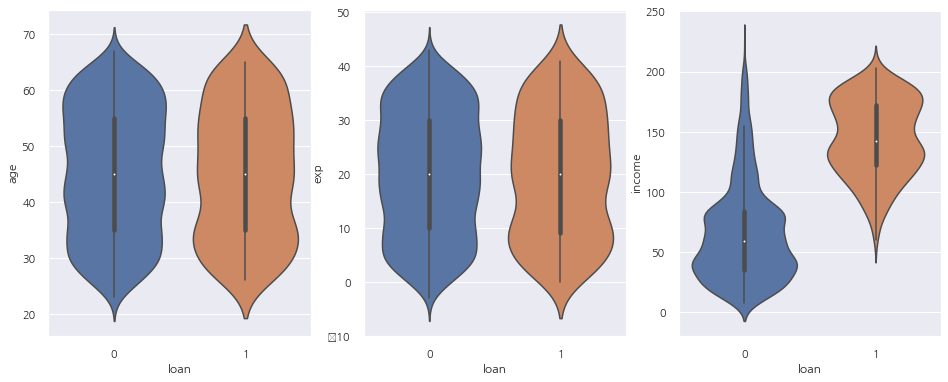

In [37]:
f , ax = plt.subplots(1,3,figsize=(16,6))

sns.violinplot(ldf1['loan'],ldf1['age'],ax=ax[0])
sns.violinplot(ldf1['loan'],ldf1['exp'],ax=ax[1])
sns.violinplot(ldf1['loan'],ldf1['income'],ax=ax[2])

# 상관관계분석하기.

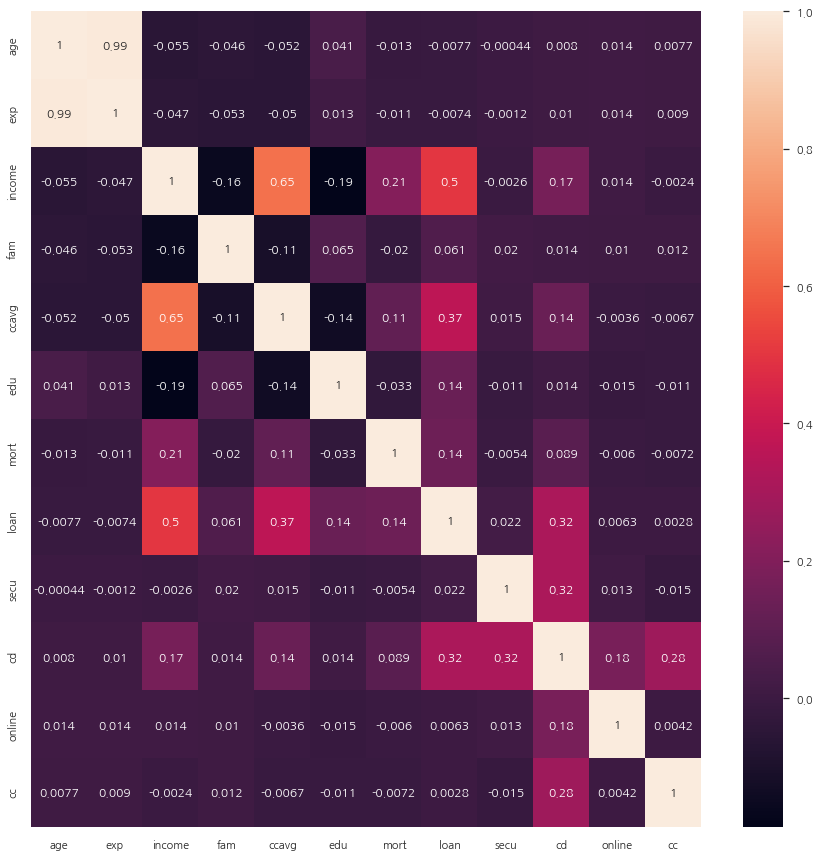

In [40]:
f, ax = plt.subplots(1,1,figsize=(15,15))

sns.heatmap(ldf1.corr(),ax=ax,annot=True)

# age와 exp는 상관관계가 높다.

# CCAvg와 수입은 중간정도의 상관관계
#-> 수입이 높을수록 신용카드 사용량이 높다. 반대도가능.

# 구간화해서 그래프 그리기.

In [41]:
# 신용카드 월평균 이용금액은 구간화하자.

df4 = ldf1[['ccavg','cc','loan']]

df4['ccavg_bin']=pd.cut(df4['ccavg'],bins=[0,2,4,6,100],labels=['0-2','3-4','5-6','7+']) # labels값으로 대체

df4.head(4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,ccavg,cc,loan,ccavg_bin
0,1.6,0,0,0-2
1,1.5,0,0,0-2
2,1.0,0,0,0-2
3,2.7,0,0,3-4


In [42]:
# 구간별로 신용카드 유무와 신용카드 월평균 사용액 집계

df5 = df4.groupby(['ccavg_bin','cc'])['ccavg'].sum().reset_index()

df5

,ccavg_bin,cc,ccavg
0,0-2,0,2172.366667
1,0-2,1,930.333333
2,3-4,0,2361.250000
3,3-4,1,970.250000
4,5-6,0,1097.300000
5,5-6,1,413.533333
6,7+,0,1236.533333
7,7+,1,508.000000


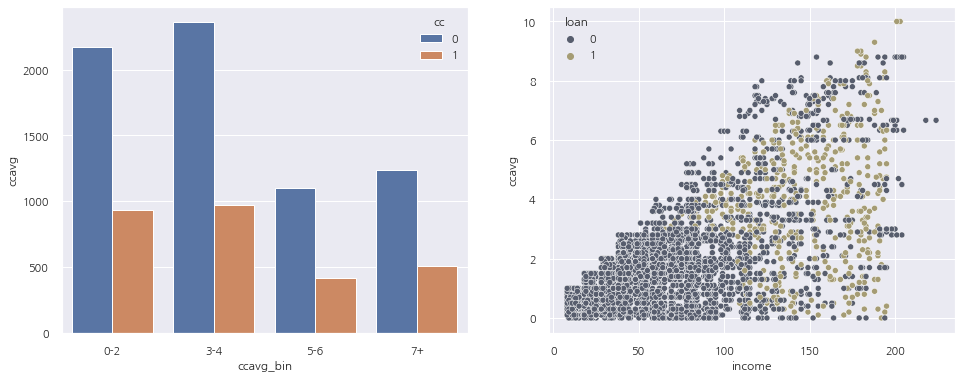

In [45]:
f, ax = plt.subplots(1,2,figsize=(16,6))

sns.barplot(data=df5,x='ccavg_bin',y='ccavg',hue='cc',ax=ax[0])

sns.scatterplot(x='income',y='ccavg',hue='loan',data=ldf1,ax=ax[1],palette='cividis')

* Thera bank 데이터는:  
총 데이터 수:  70000  
총 결측치 수: 0 = 전체 데이터의 0.00%   
Thera bank 고객의 나이는 23세부터 67세까지 있으며 평균 나이는 45.3세이다.  
Thera bank 고객의 평균 수입은 73774.2 $이며, 최고수입은 224000 $로 평균의 3.0배이다.

* 수입/월평균신용카드사용량/가족인원수와 대출 사이의 관계는?  
   : 대출 받은 사람의 수입이 대출 받지 않은 사람보다 3배 정도 높다  
   : 대출받은 사람이 받지 않은 사람보다 월평균 신용카드 사용액이 2배 가량 높다  
   : 가족 인원수가 많을 수록 대출 금액이 올라가나 정비례 하지는 않는다  
* 월 평균 사용 금액을 구간화 해서 특징을 볼 수 있을까?